#  Spotify Songs Clustering Project with Unsupervised Learning  

This project explores Spotify Songs dataset using unsupervised learning to discover latent musical style clusters.  I will perform full EDA, preprocessing, dimensionality reduction, clustering, and finally model comparison.


# Contents
1.	Introduction and problem statement
2.	EDA and data cleaning
    - Load and inspect the dataset
    - Perform EDA (distributions, correlations, outliers)
3.	Feature engineering and preprocessing:
    - Clean and preprocess the data (missing values, scaling)
    - Apply PCA to visualize feature space
4.	Unsupervised modeling 
    - K Means
    - K Means Hyperparamter tuning
    - NMF (Non-Negative Matrix Factorization)
5.	Model conclusion and discussion


# 1. Introduction and Problem

### Data source: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks

### Data:

 This is a dataset of Spotify tracks over a range of different genres and 160K tracks. Each track has some audio features associated with it.

### Problem statement 

I will use unsupervised learning to discover latent “music style clusters” based on Spotify’s audio features. The goal is to group songs into coherent clusters (e.g., calm acoustic songs, energetic dance tracks, rock songs) without using explicit genre or labels. This can support playlist generation, recommendation, and exploratory analysis of musical space.


## 1.1 Project goal

Goal: Use unsupervised learning to discover meaningful clusters of songs based on Spotify’s audio features (e.g., danceability, energy, valence). 

## 1.2 Import libraries
I will import standard data science libraries plus scikit learn tools for scaling, PCA, and clustering.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.dpi"] = 120



# 2. Data Cleaning and EDA

## 2.1 Load the dataset
Next, I will read the CSV file into a DataFrame and inspect the first few rows to understand its structure.


In [73]:
df = pd.read_csv("data.csv")  
df.head()


valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

## 2.2 Basic dataset overview
I will look at how many rows/columns, dtypes are, summary statistics, and how many missing values we have.


In [74]:
# Structure: columns, dtypes, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [75]:
# Summary statistics for numeric columns
df.describe().T

count           mean            std     min          25%  \
valence           170653.0       0.528587       0.263171     0.0       0.3170   
year              170653.0    1976.787241      25.917853  1921.0    1956.0000   
acousticness      170653.0       0.502115       0.376032     0.0       0.1020   
danceability      170653.0       0.537396       0.176138     0.0       0.4150   
duration_ms       170653.0  230948.310666  126118.414668  5108.0  169827.0000   
energy            170653.0       0.482389       0.267646     0.0       0.2550   
explicit          170653.0       0.084575       0.278249     0.0       0.0000   
instrumentalness  170653.0       0.167010       0.313475     0.0       0.0000   
key               170653.0       5.199844       3.515094     0.0       2.0000   
liveness          170653.0       0.205839       0.174805     0.0       0.0988   
loudness          170653.0     -11.467990       5.697943   -60.0     -14.6150   
mode              170653.0       0.706902       0.455184     0.0       0.0000   
popularity        170653.0      31.431794      21.826615     0.0      11.0000   
speechiness       170653.0       0.098393       0.162740     0.0       0.0349   
tempo             170653.0     116.861590      30.708533     0.0      93.4210   

                            50%          75%          max  
valence                0.540000       0.7470        1.000  
year                1977.000000    1999.0000     2020.000  
acousticness           0.516000       0.8930        0.996  
danceability           0.548000       0.6680        0.988  
duration_ms       207467.000000  262400.0000  5403500.000  
energy                 0.471000       0.7030        1.000  
explicit               0.000000       0.0000        1.000  
instrumentalness       0.000216       0.1020        1.000  
key                    5.000000       8.0000       11.000  
liveness               0.136000       0.2610        1.000  
loudness             -10.580000      -7.1830        3.855  
mode                   1.000000       1.0000        1.000  
popularity            33.000000      48.0000      100.000  
speechiness            0.045000       0.0756        0.970  
tempo                114.729000     135.5370      243.507

In [76]:
# Missing values per column
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

COMMENTS: 
- There are 170653 (Tracks) rows and 19 columns (Features). Out of these some are non-numeric like artist, id, name, release date. I will not use these features for the clustering project.
- None of the important audio features have missing values so we dont have to worry about missing values

## 2.3 Select audio features
For clustering, I want to use purely numeric audio features. 

- The main audio features which I will use for further analysis are:

    - valence (float): musical positivity/happiness.
    - acousticness (float): likelihood the track is acoustic.
    - danceability (float): suitability for dancing.
    - duration_ms (int): track length in milliseconds.
    - energy (float): intensity/activity.
    - instrumentalness (float): likelihood of being instrumental.
    - liveness (float): probability of live performance.
    - loudness (float): overall loudness in dB.
    - speechiness (float): presence of spoken words.
    - tempo (float): beats per minute.

- Features I will exclude from clustering:
    - year, popularity, explicit, key, mode → categorical or metadata
    - artists, id, name, release_date → identifiers/labels

In [77]:
audio_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

df_features = df[audio_features]
df_features.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.279   0.211   -20.096       0.0366         0.982   
1         0.819   0.341   -12.441       0.4150         0.732   
2         0.328   0.166   -14.850       0.0339         0.961   
3         0.275   0.309    -9.316       0.0354         0.967   
4         0.418   0.193   -10.096       0.0380         0.957   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.878000     0.665   0.0594   80.954       831667  
1          0.000000     0.160   0.9630   60.936       180533  
2          0.913000     0.101   0.0394  110.339       500062  
3          0.000028     0.381   0.1650  100.109       210000  
4          0.000002     0.229   0.2530  101.665       166693

## 2.4 EDA: Univariate distributions
To begin EDA, I will plot histograms to see the shape  of each feature. This will help with any transformations needed on the data later on.

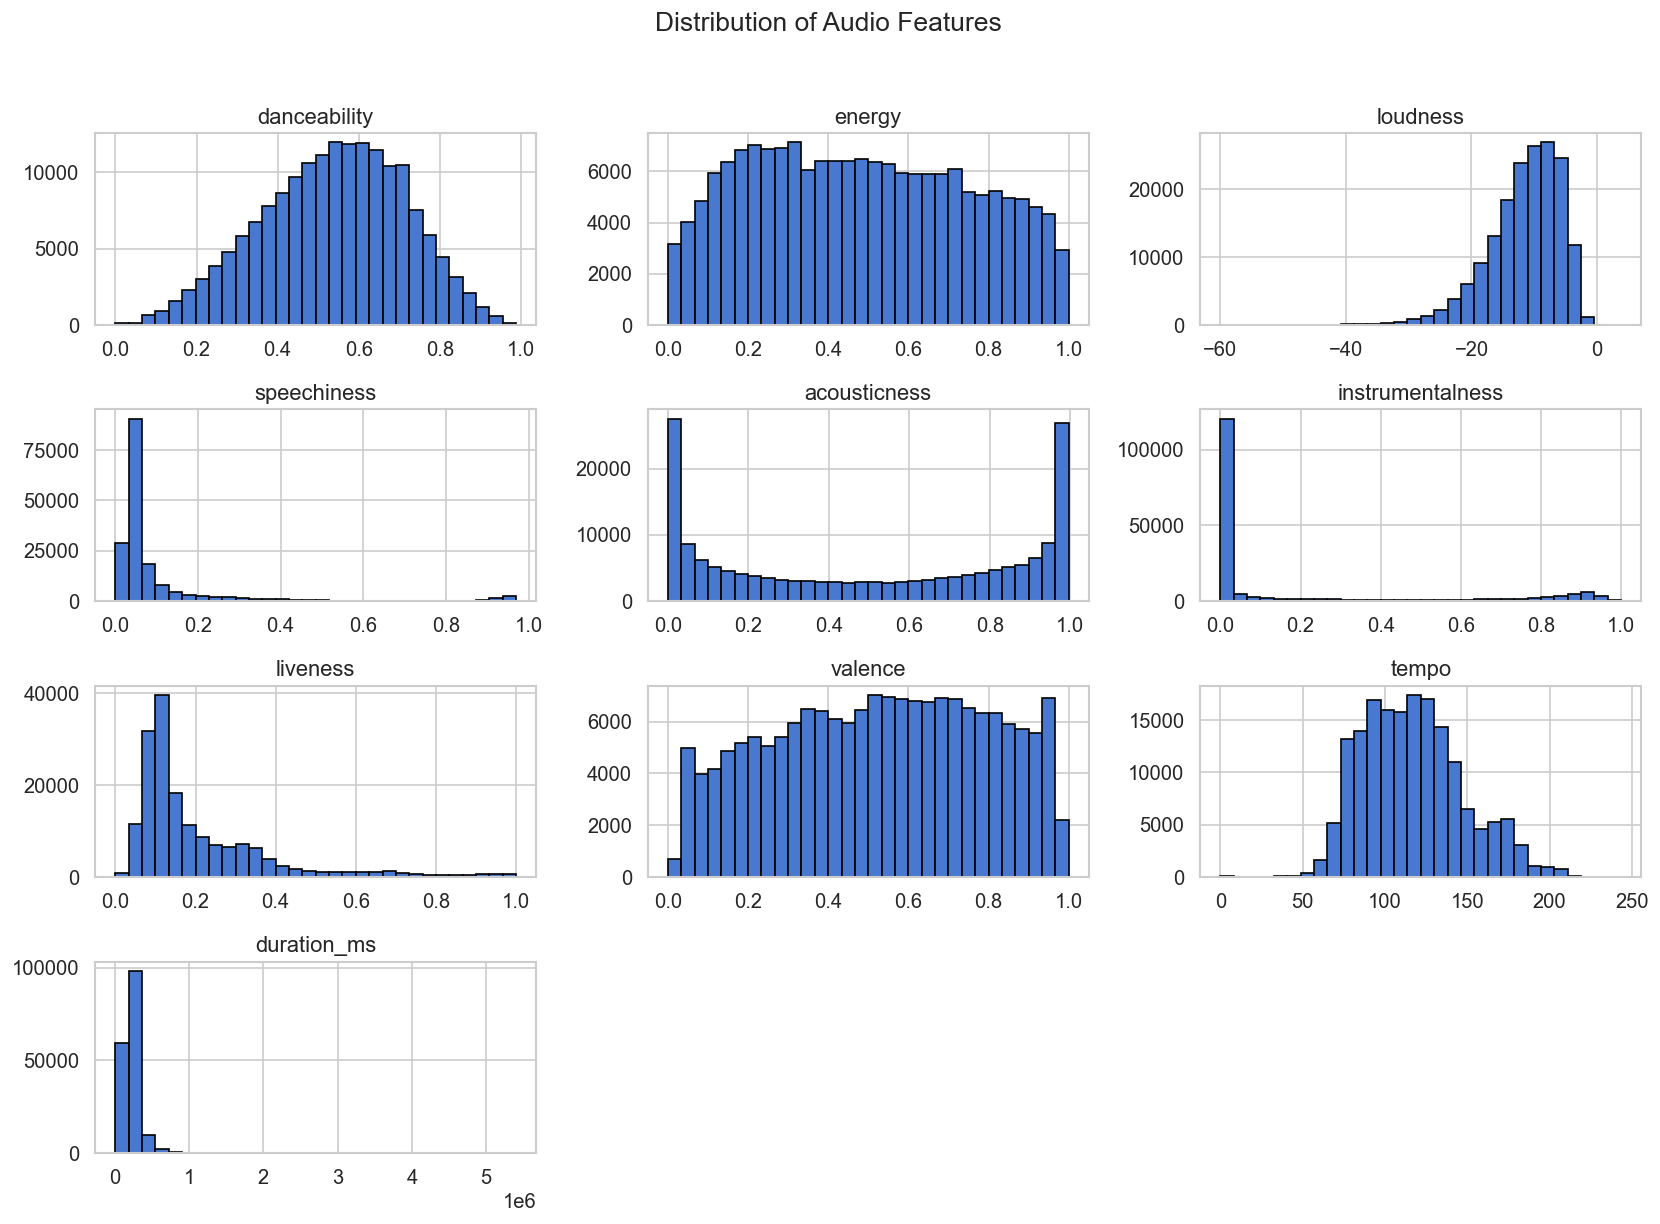

In [78]:
df_features.hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Distribution of Audio Features", y=1.02)
plt.tight_layout()
plt.show()

Observations:

1. Some Features are bound between 0 to 1 like: danceability, energy, valence, liveness.
2. There are some highly skewed features like instrumentalness, acousticness, duration_ms.
3. Loudness and tempo have a unimodal distribution while duration_ms and speechiness have a long tail indicating higher number of short, speechy tracks in the dataset
4. Some features like instrumentalness and acousticness are multimodal showing 2 or more peaks.


## 2.5 EDA: boxplots for outliers
Next, I will look at some boxplots to highlight extreme values that might distort distance based clustering.

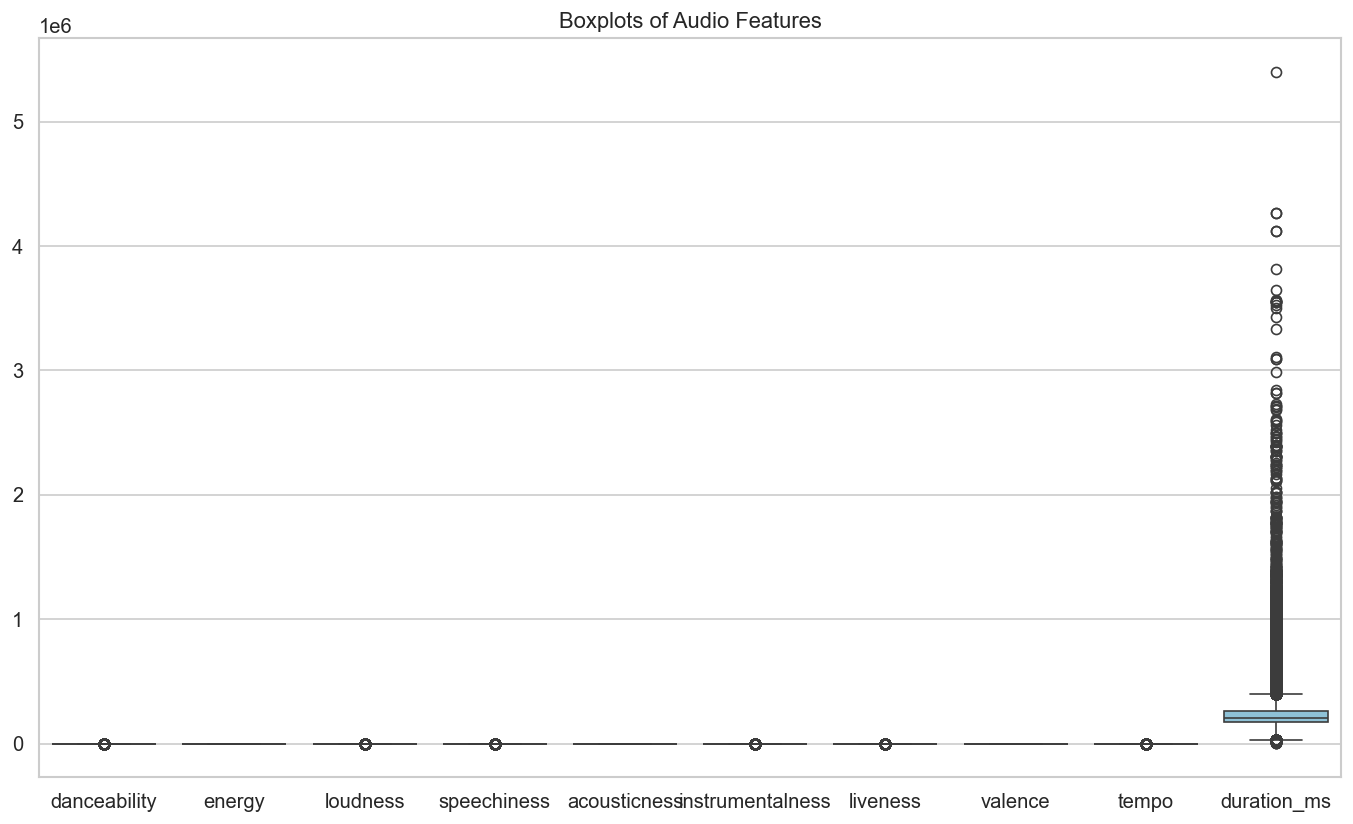

In [79]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_features)
plt.title("Boxplots of Audio Features")
plt.show()

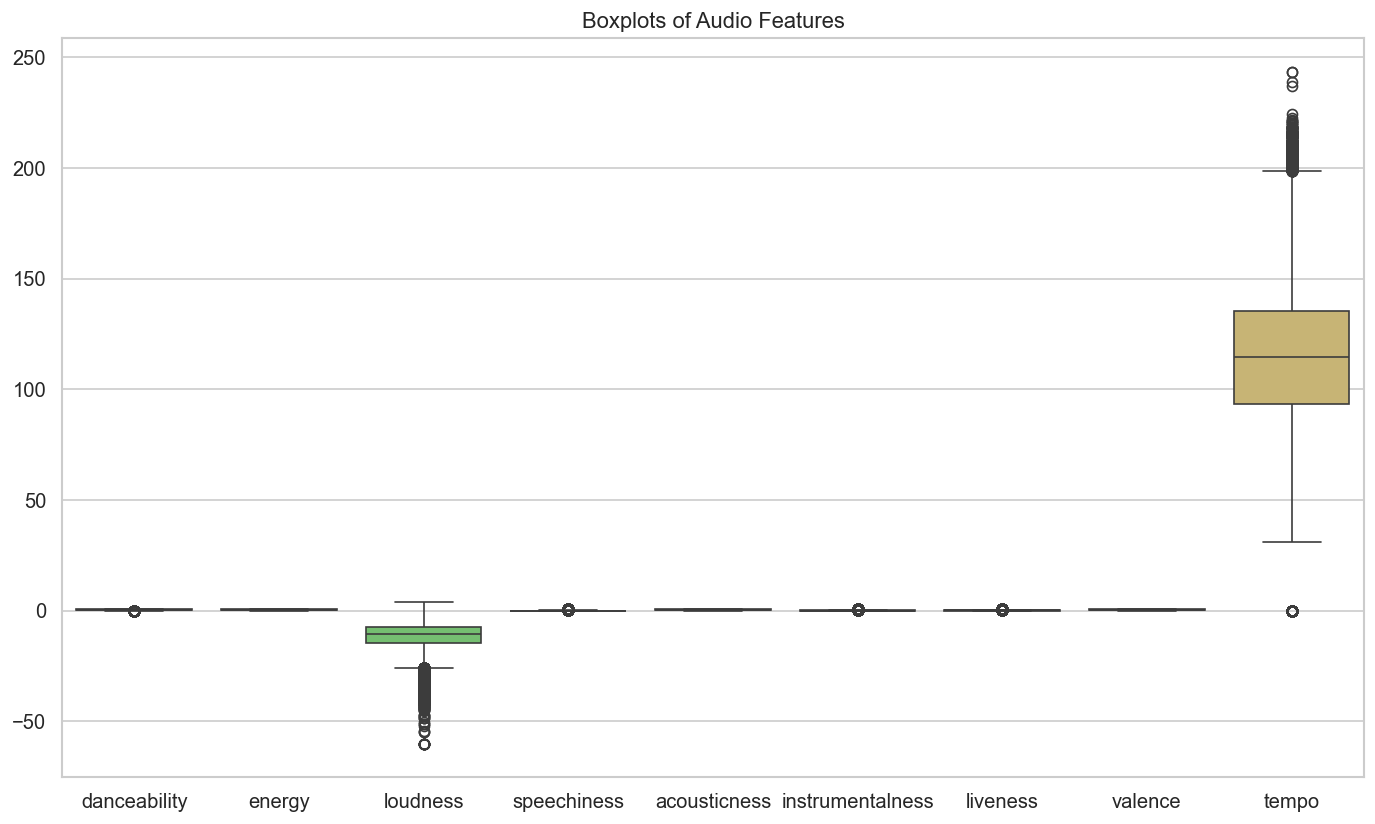

In [80]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_features[[
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]])
plt.title("Boxplots of Audio Features")
plt.show()

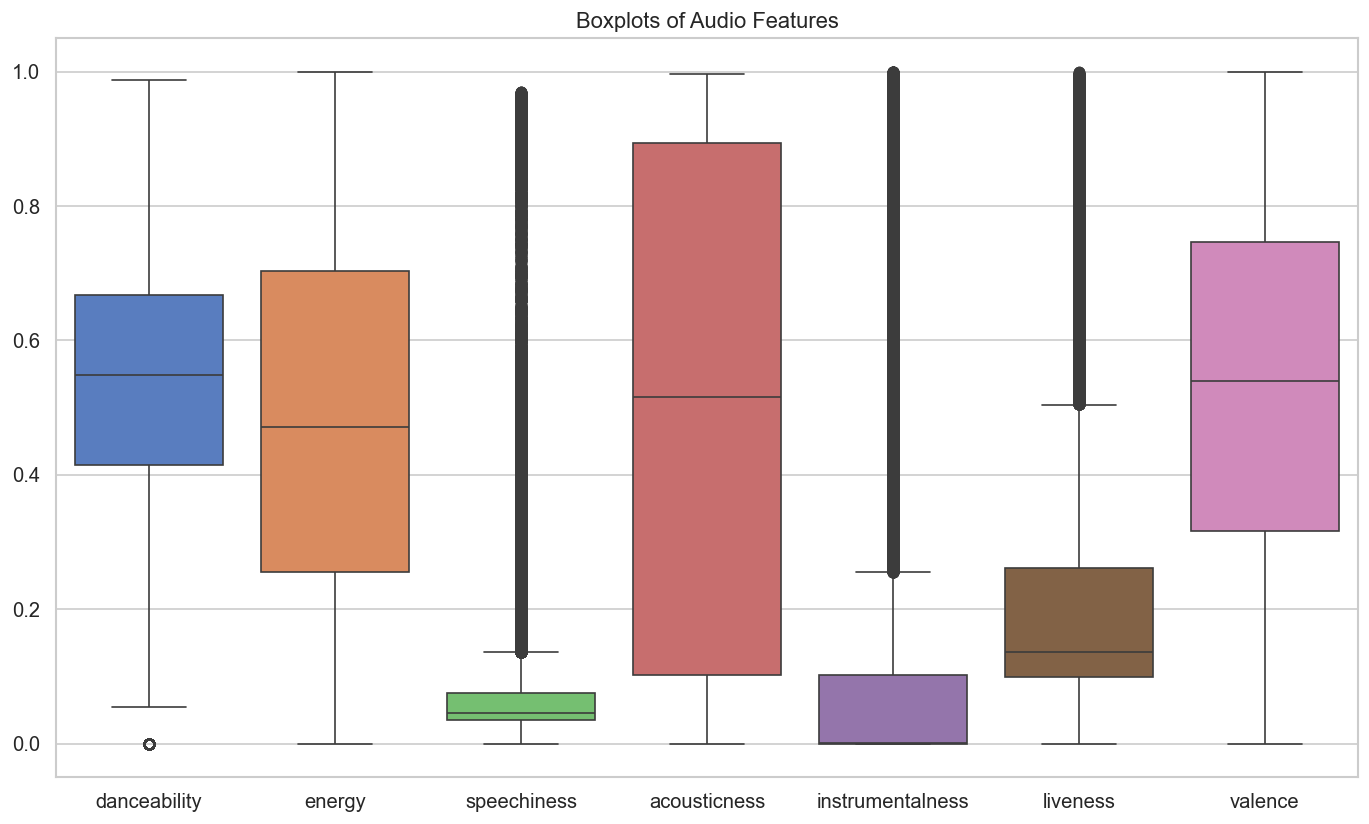

In [81]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_features[[
    "danceability", "energy", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence"
]])
plt.title("Boxplots of Audio Features")
plt.show()

Observations: duration_ms, loudness, tempo, speechiness, instrumentalness have many extreme points.

## 2.6 EDA: correlation matrix
Lets look at correlation matrix to see relationships between features.

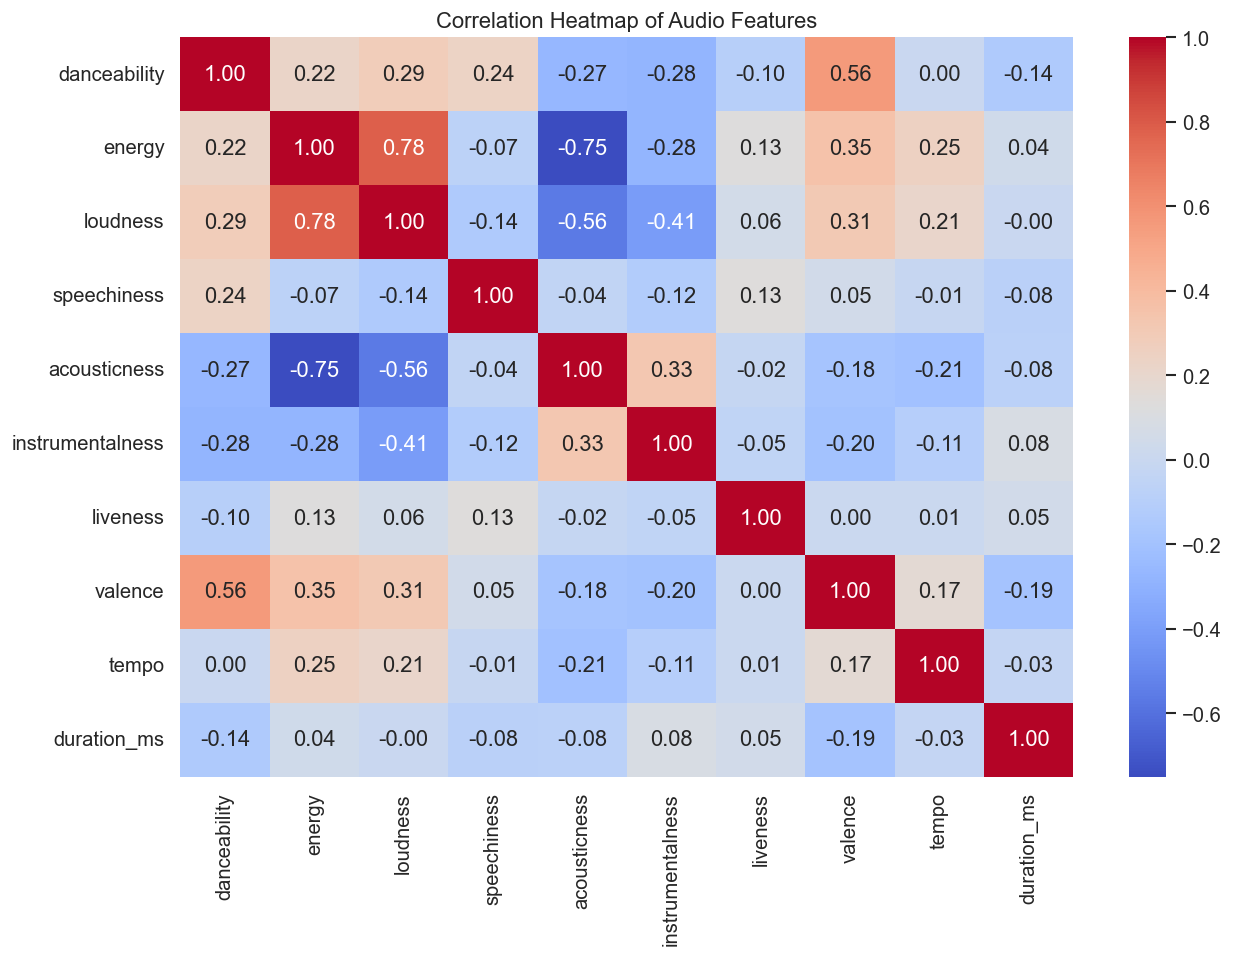

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

Observations:
-	Energy and loudness: strong positive correlation.
-	Acousticness and energy: strong negative correlation.
-	Valence and danceability: mild positive correlation
-   Acousticness and loudness: mild negative correlation

## 2.7 EDA: skewness check
Numerically check skewness to decide if log transforms or removing highly skewed features may help.

In [83]:
df_features.skew().sort_values(ascending=False)

duration_ms         7.313741
speechiness         4.047848
liveness            2.154382
instrumentalness    1.631114
tempo               0.449741
energy              0.112035
acousticness       -0.032582
valence            -0.107120
danceability       -0.223471
loudness           -1.051841
dtype: float64

Observations:

- Positive skew > 1 suggests a long right tail for duration_ms,speechiness,liveness,instrumentalness.

- Since the skewness of duration_ms and speechiness is very high and these features most likely dont impact the themes of music, I will be dropping these from the raw data for further cluster analysis.

# 3. Feature Engineering and Preprocessing

## 3.1 Handle missing values
A clean dataset for clustering. Checking again for any missing values. 


In [84]:
# Check missing again before cleaning
df.isna().sum()
# Simple strategy: drop rows with any missing values
df_clean = df.dropna()
df_clean.shape

(170653, 19)

As there are no missing values, we can proceed with df_clean for further analysis.

## 3.2 Remove extreme outliers (z score)
Distance based methods like K Means are sensitive to outliers. We can remove rows where any feature has an extreme z score.


In [85]:
z = np.abs(zscore(df_clean[audio_features]))
z.shape
# Keep only rows where all feature z-scores are < 8
df_no_outliers = df_clean[(z < 8).all(axis=1)]
df_no_outliers.shape

(170380, 19)

Comments: 273 rows were removed as outliers as we have used a pretty conservative threshold of Z < 8.

## 3.3 Scale the features
In the EDA, it was seen that different features have different ranges. Some of them go from 0-1 while others range over much higher values. I will now standardize data them so each feature contributes more fairly to distances.

In [86]:
audio_features_n = ["danceability", "energy", "loudness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers[audio_features_n])
X_scaled[:5]

array([[-1.47038441, -1.0148739 , -1.51950669,  1.27713215,  2.26993904,
         2.63656102, -1.78526714, -1.17055181],
       [ 1.59869142, -0.5291456 , -0.17270675,  0.61225999, -0.53222333,
        -0.26133164,  1.64986535, -1.82259656],
       [-1.1918942 , -1.18301063, -0.59653967,  1.22128289,  2.38164255,
        -0.59989732, -1.86129929, -0.21339649],
       [-1.49311831, -0.64870949,  0.37709728,  1.23723982, -0.53213493,
         1.00685505, -1.38381739, -0.54661749],
       [-0.68038156, -1.08212859,  0.2398662 ,  1.21064493, -0.53221797,
         0.13461805, -1.04927594, -0.49593402]])


After scaling, each feature has roughly mean 0 and std 1. So this data can now be used for modelling.

### 3.4 PCA: fit and inspect variance
PCA reduces dimensionality and helps visualize structure in 2D. I will start with 2 principal components for visualization.

In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_no_outliers["PC1"] = X_pca[:, 0]
df_no_outliers["PC2"] = X_pca[:, 1]

explained_var = pca.explained_variance_ratio_;
explained_var

/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/1184208463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["PC1"] = X_pca[:, 0]
/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/1184208463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["PC2"] = X_pca[:, 1]


array([0.38500414, 0.15902317])

Comments: 'explained_var' gives the fraction of variance captured by PC1 and PC2. So 0.39, 0.16 together explain ~55% of variance in 2D.

## 3.5 PCA: 2D scatter plot
Next, I will try to visualize all songs in the space of PC1 vs PC2 by plotting them.

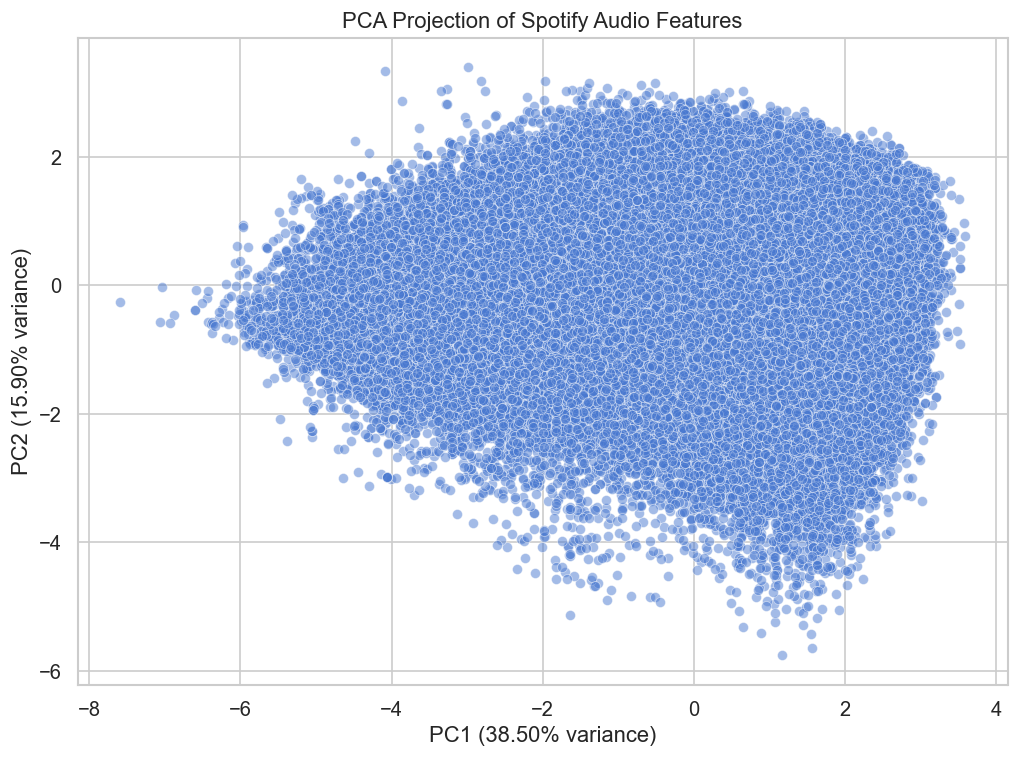

In [88]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PC1", y="PC2",
    data=df_no_outliers,
    alpha=0.5
)
plt.title("PCA Projection of Spotify Audio Features")
plt.xlabel(f"PC1 ({explained_var[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.2f}% variance)")
plt.show()

## 3.6 PCA: feature loadings
PCA loadings tell us how each original feature contributes to each principal component.

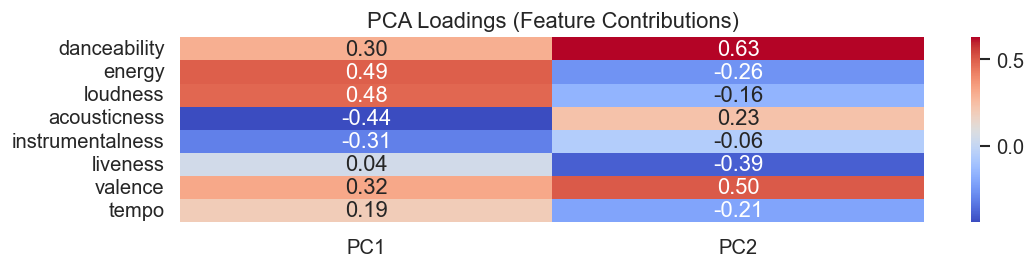

In [89]:
selected_features = [f for f in audio_features if f not in ["speechiness", "duration_ms"]]

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=selected_features
)

plt.figure(figsize=(10, 2))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("PCA Loadings (Feature Contributions)")
plt.show()

Observations: 
- PC1 has high positive loadings for energy, loudness and high negative loading for acousticness
- PC2 has high positive loadings for danceability, valence and high negative loadings for liveliness

# 4. Unsupervised Modelling

## 4.1 K Means: k with elbow method
I will try different numbers of clusters (k) and plot inertia to find an elbow.

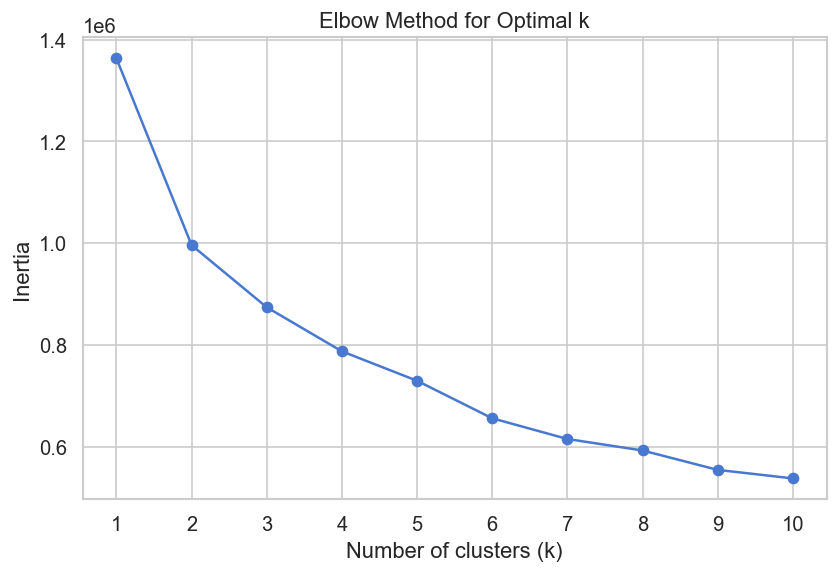

In [90]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init="auto", max_iter=300, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(K)
plt.show()

The inertia curve bends/levels off around k = 4, so I will be looking at using 4 clusters. 

## 4.2 K Means: fit final model and label data
Next, I will train K Means with k=4 and assign cluster labels to each song.

In [91]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, init="k-means++", n_init="auto", max_iter=300, random_state=42)
df_no_outliers["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/1698742126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["kmeans_cluster"] = kmeans.fit_predict(X_scaled)


## 4.3 K Means: visualize clusters in PCA space
Next, I will color the PCA plot by K Means cluster to see separations in 2D.

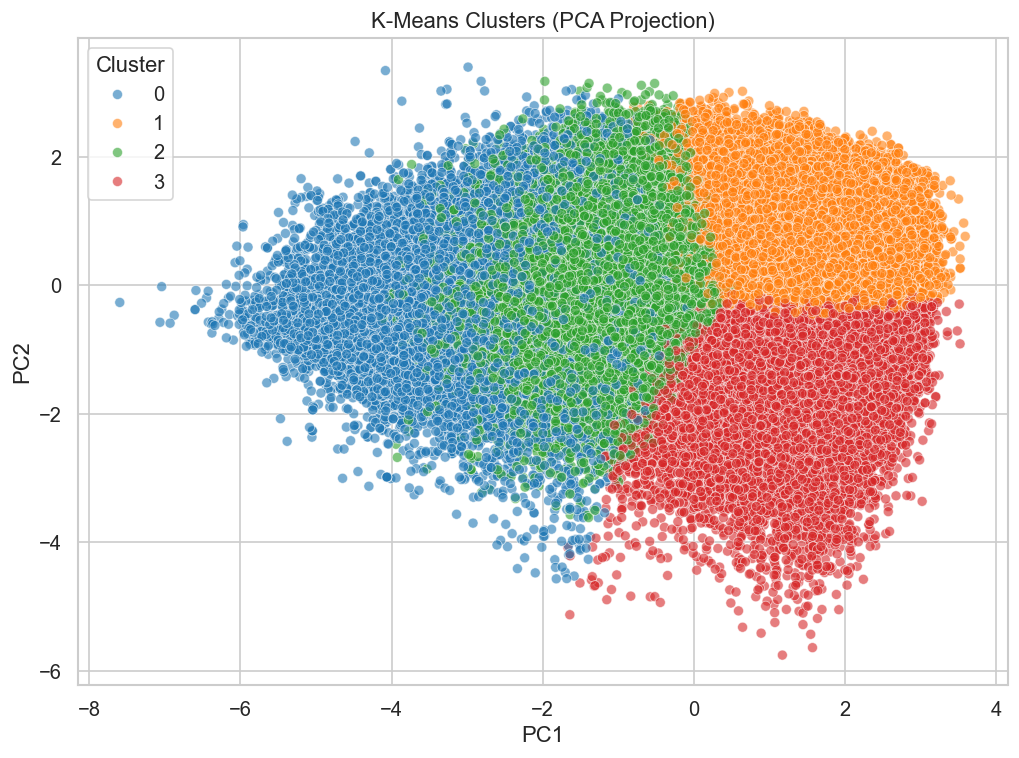

In [92]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="kmeans_cluster",
    palette="tab10",
    data=df_no_outliers,
    alpha=0.6
)
plt.title("K-Means Clusters (PCA Projection)")
plt.legend(title="Cluster")
plt.show()


Observations:

- Here I can see 4 distinct clusters. Some of the clusters are compact while others are overlapping.
- Some clusters are clearly separated along PC1, while others overlap more along PC2

## 4.4 K Means: silhouette score
Silhouette score measures how well separated the clusters are (< 1 = overlapping, negative = bad). This will give me a score to decide how well the clusters are separated using KMeans and other methods I will use.

In [57]:
kmeans_sil = silhouette_score(X_scaled, df_no_outliers["kmeans_cluster"])
print("K-Means Silhouette Score:", kmeans_sil)

K-Means Silhouette Score: 0.18056484453769167


The positive score of ~0.2 indicate some overlapping between the cluster which is expected since every cluster represents a specific type of musically style. There will be always some commonality between different styles or patterns of music.

## 4.5 Hyper parameter tuning: Silhouette Score vs Number of Clusters
Next, I will evaluate clustering quality across different k values (Hyperparameter) using the silhouette score.

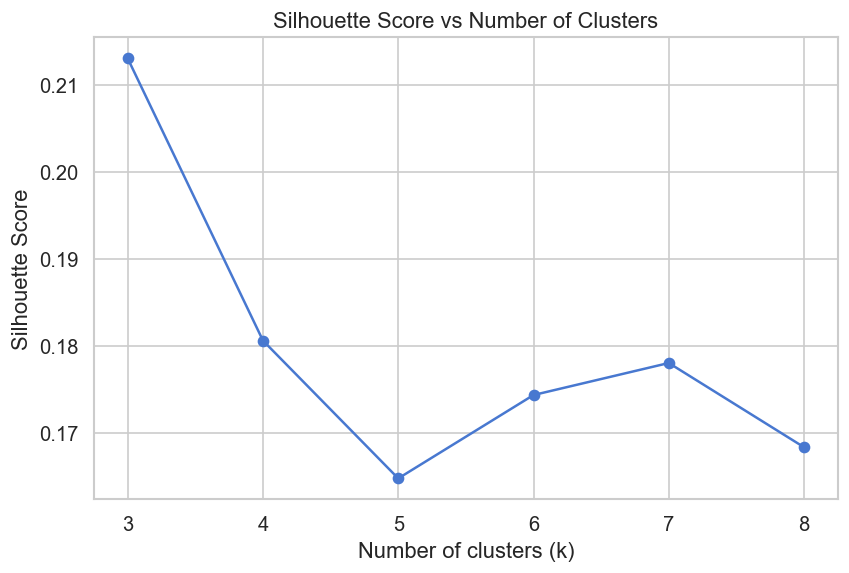

In [58]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(3, 9)

for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init="auto", max_iter=300, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker="o")
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.show()


Observations:
- The plot shows how silhouette score changes with k.   
- Based on the elbow method I had selected k = 4 as the number optimal number of clusters. However, based on the silhouette score, k=3 gives the highest silhouette score indicating its the optimal number of clusters.
- Clusters more than k = 4 result in lower silhouette score.
- Based on this hyper parameter tuning, k = 3 or k = 4 will give good results for Unsupervised K-Means clustering


## 4.6 Cluster interpretation: K Means summary table
In order to better understand and visualize what each cluster means I will compute mean feature values per cluster to understand their “personality”.

In [93]:
kmeans_summary = df_no_outliers.groupby("kmeans_cluster")[audio_features_n].mean().round(2)
kmeans_summary

danceability  energy  loudness  acousticness  \
kmeans_cluster                                                 
0                       0.40    0.22    -18.42          0.89   
1                       0.69    0.63     -8.64          0.31   
2                       0.50    0.26    -14.25          0.78   
3                       0.46    0.75     -7.19          0.15   

                instrumentalness  liveness  valence   tempo  
kmeans_cluster                                               
0                           0.81      0.18     0.36  105.36  
1                           0.06      0.15     0.74  116.27  
2                           0.03      0.21     0.43  109.43  
3                           0.09      0.30     0.47  135.57

/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/2388896888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[["tempo_scaled", "loudness_scaled"]] = scaler_vis.fit_transform(
/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/2388896888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[["tempo_scaled", "loudness_scaled"]] = scaler_vis.fit_transform(


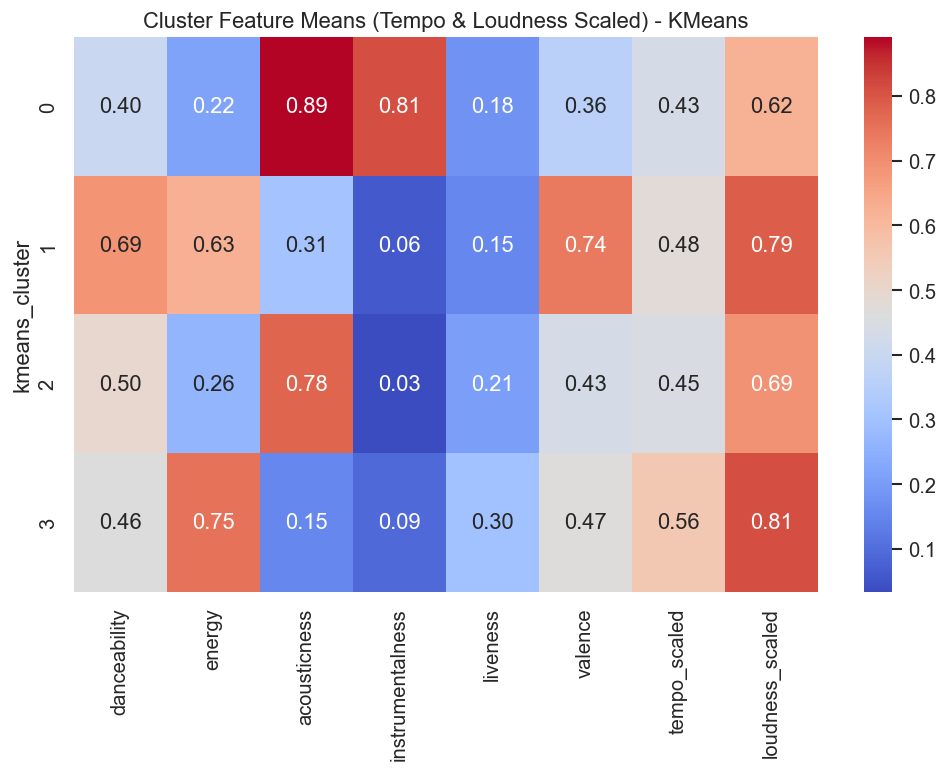

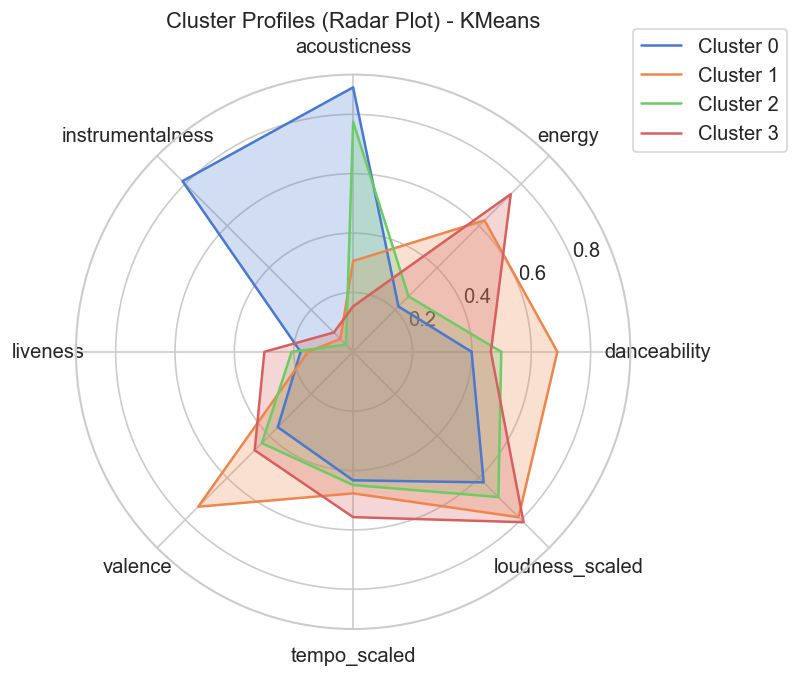

In [94]:
# Visualizations of cluster profiles
from sklearn.preprocessing import MinMaxScaler

# Scale tempo and loudness into [0,1] for visualization
scaler_vis = MinMaxScaler()
df_no_outliers[["tempo_scaled", "loudness_scaled"]] = scaler_vis.fit_transform(
    df_no_outliers[["tempo", "loudness"]]
)

# Update feature list for visualization (replace raw tempo and loudness)
audio_features_scaled = [
    f for f in audio_features_n if f not in ["tempo", "loudness"]
] + ["tempo_scaled", "loudness_scaled"]

# Recompute cluster summary
kmeans_summary = df_no_outliers.groupby("kmeans_cluster")[audio_features_scaled].mean().round(3)

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(kmeans_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Feature Means (Tempo & Loudness Scaled) - KMeans")
plt.show()

import numpy as np

# Radar plot for each cluster
features = kmeans_summary.columns
num_features = len(features)

angles = np.linspace(0, 2*np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for i, row in kmeans_summary.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Cluster {i}")
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title("Cluster Profiles (Radar Plot) - KMeans")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

### KMeans Cluster Interpretations

Based on looking at the mean scores, the heat-map and also the radar plot here are my intepretations for the clusters (they might be subjective).

Cluster 0 (Acoustic-Instrumental)
- Low danceability & energy, very high acousticness, high instrumentalness, soft loudness
- Tempo ~105 BPM, moderate valence (mood).
- Description: Acoustic/Instrumental tracks — quiet, mellow, mellow, soft tracks.


Cluster 1(Pop/Dance)
- High danceability & energy, low acousticness, low instrumentalness, bright loudness, high valence
- Tempo ~116 BPM.
- Description: Mainstream Pop or Dance tracks — upbeat, energetic, happy songs.

Cluster 2(Acoustic-Song)
- Moderate danceability, low energy, high acousticness, low instrumentalness, soft loudness, mid valence
- Tempo ~109 BPM.
- Description: Acoustic song vibe — gentle, acoustic tracks with vocals, low on instruments

-Cluster 3: (Rock/Metal/Live)
- Very high energy, high temp, low acousticness, high loudness, higher liveness, mid valence
- Fast tempo ~135 BPM.
- Description: High‑energy Rock music tracks — loud, fast, energetic songs




## 4.7 Using Non‑negative Matrix Factorization (NMF) 
Next, I will try out using NMF (Non-Negative Matrix Factorization) which is a dimensionality reduction technique that decomposes the dataset into latent components. Unlike K Means, which will assign each track to a single cluster, NMF allows multiple/mixed membership. This means: a song can load partially on multiple latent “styles” (70% cluster 1, 30% cluster 2).


In [95]:
from sklearn.decomposition import NMF

# Choose number of components (similar to clusters)
n_components = 4
nmf = NMF(n_components=n_components, random_state=42, init="nndsvda", max_iter=500)

# Fit NMF on scaled features (must be non-negative, using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler_nmf = MinMaxScaler()
X_nmf = scaler_nmf.fit_transform(df_no_outliers[audio_features_n])

W = nmf.fit_transform(X_nmf)   # song loadings
H = nmf.components_            # latent components

# Add dominant component label for each song
df_no_outliers["nmf_component"] = W.argmax(axis=1)

# Inspect component definitions
nmf_summary = pd.DataFrame(H, columns=audio_features_n)
nmf_summary.round(3)


/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/4241912920.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["nmf_component"] = W.argmax(axis=1)


danceability  energy  loudness  acousticness  instrumentalness  liveness  \
0         6.354   0.000    14.184        30.557             0.000     5.183   
1         0.000   0.113     0.000         1.220            17.845     0.000   
2         6.742  20.671    20.169         0.000             0.000     7.579   
3         4.912   2.172     2.527         0.000             0.000     0.000   

   valence   tempo  
0    1.054   9.769  
1    0.860   0.426  
2    0.000  13.121  
3    7.694   1.463

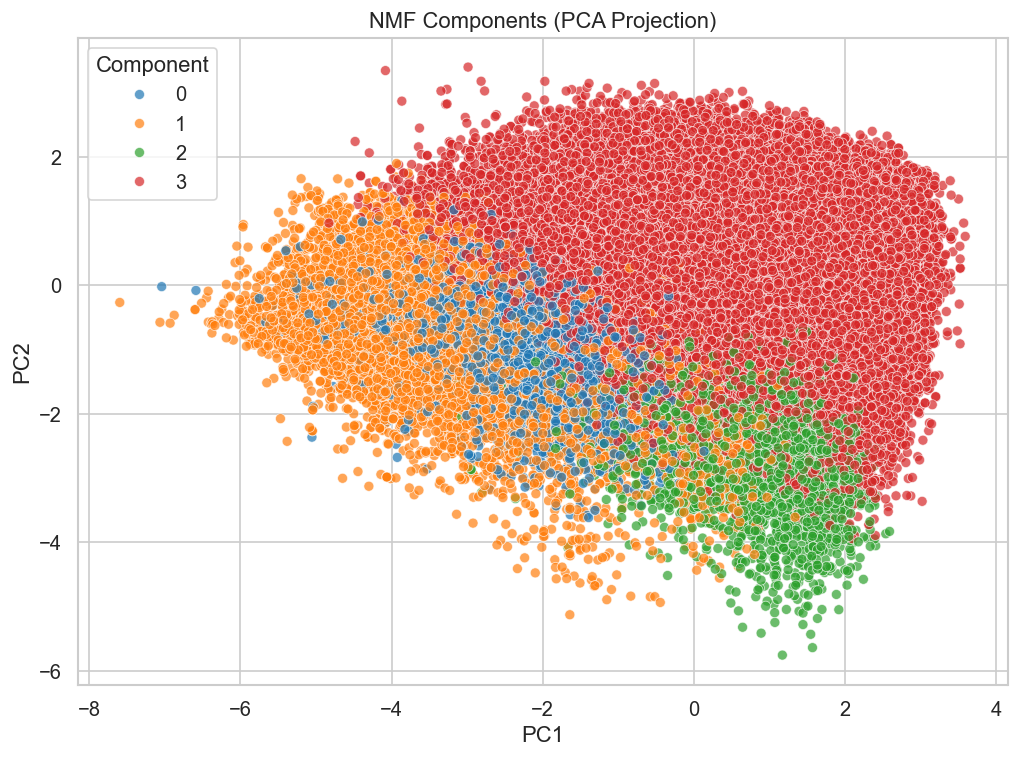

In [96]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="nmf_component",
    palette="tab10",
    data=df_no_outliers,
    alpha=0.7
)
plt.title("NMF Components (PCA Projection)")
plt.legend(title="Component")
plt.show()


Observations:

- Each color represents a latent style discovered by NMF.  
- Unlike K Means boundaries are softer: songs may load partially on multiple components. As a result, on the PCA plot the clusters overlap for NMF.

/var/folders/bz/27w426j51mn3z8hlzx67h7wh0000gn/T/ipykernel_28103/2206419664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[["tempo_scaled", "loudness_scaled"]] = scaler_vis.fit_transform(


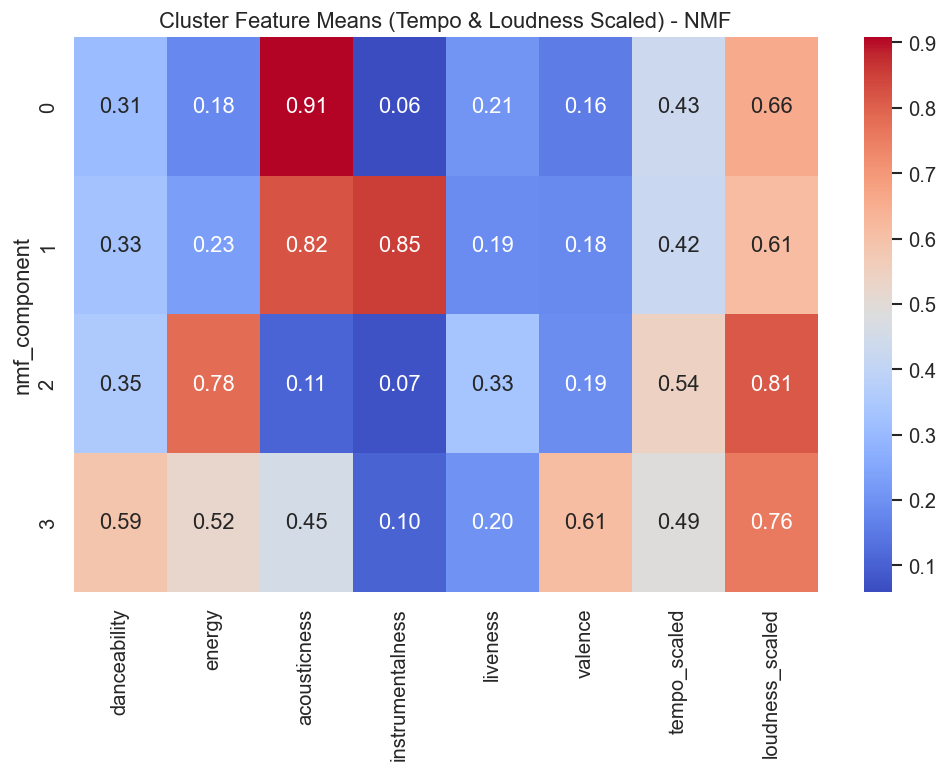

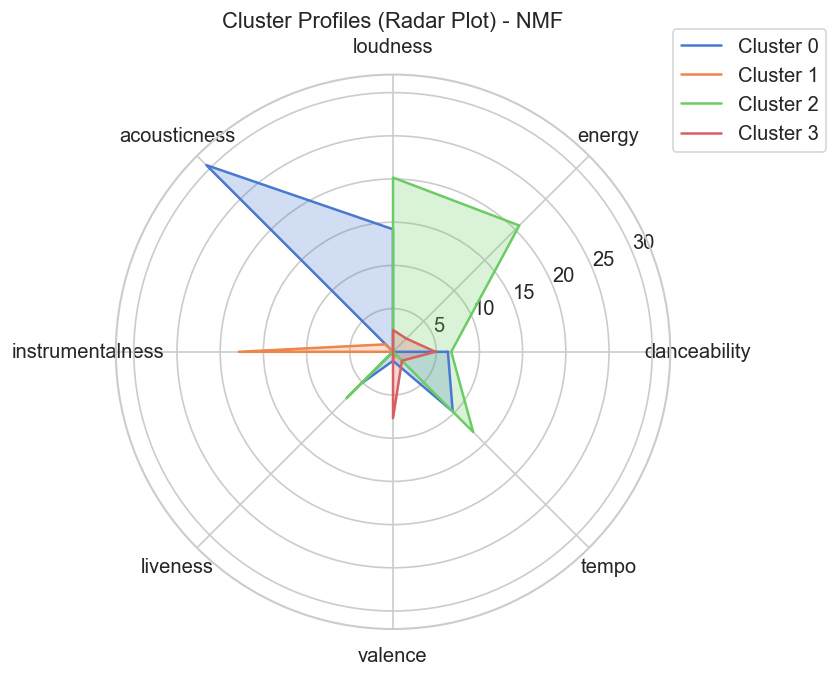

In [97]:
from sklearn.preprocessing import MinMaxScaler

# Scale tempo and loudness into [0,1] for visualization
scaler_vis = MinMaxScaler()
df_no_outliers[["tempo_scaled", "loudness_scaled"]] = scaler_vis.fit_transform(
    df_no_outliers[["tempo", "loudness"]]
)

# Update feature list for visualization (replace raw tempo and loudness)
audio_features_scaled = [
    f for f in audio_features_n if f not in ["tempo", "loudness"]
] + ["tempo_scaled", "loudness_scaled"]

# Recompute cluster summary
kmeans_summary = df_no_outliers.groupby("nmf_component")[audio_features_scaled].mean().round(3)

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(kmeans_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Feature Means (Tempo & Loudness Scaled) - NMF")
plt.show()

import numpy as np

# Radar plot for each cluster
features = nmf_summary.columns
num_features = len(features)

angles = np.linspace(0, 2*np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for i, row in nmf_summary.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Cluster {i}")
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title("Cluster Profiles (Radar Plot) - NMF")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()


# NMF Components Interpretations
These clusters can be interpreted as components by inspecting the `nmf_summary` table.  NMF summary is showing latent musical styles rather than hard clusters like in KMeans

Component 0 → Acoustic/Folk
- High acousticness (30.6), moderate danceability (6.35), soft loudness (14.18)
- low energy and valence.
- Interpretation: Acoustic/folk style — mellow, unplugged tracks with acoustic instruments, not energetic.

Component 1 → Instrumental/Classical
- Very high instrumentalness (17.8), almost no energy, loudness, or danceability.
- Low acousticness, low valence.
- Interpretation: Instrumental/classical style — tracks dominated by instruments, minimal vocals

Component 2 → High‑energy Rock
- Very high energy (20.7), high loudness (20.1), strong danceability (6.74), fast tempo (13.1), plus liveness.
- Acousticness and instrumentalness near zero.
- Interpretation: High‑energy pop/rock style — loud, fast, danceable tracks

Component 3 → Upbeat Pop
- Moderate danceability (4.91), moderate energy (2.17), moderate loudness (2.52), high valence (7.69).
- Acousticness and instrumentalness near zero.
- Interpretation: Upbeat pop style — cheerful, happy songs with energy, lighter than comp. 2.



# 5 Conclusions


In this project I applied unsupervised learning to the Spotify Songs dataset to uncover latent musical styles.  
Through EDA, I identified skewed features (e.g., duration_ms, speechiness) and removed them to improve clustering quality.  
PCA revealed that energy, loudness, and acousticness drive much of the variance, while danceability and valence contribute to secondary dimensions.  

K‑Means clustering (k=3–4) produced interpretable groups such as acoustic/instrumental tracks, upbeat dance/pop songs, and high‑energy rock/live tracks, though silhouette scores (~0.18–0.20) indicated overlapping styles.  
NMF provided a complementary perspective, decomposing songs into blended latent components (acoustic/folk, instrumental/classical, high‑energy pop/rock, upbeat pop), highlighting that many tracks mix stylistic elements rather than fitting neatly into one cluster.  

Overall, the analysis demonstrates that unsupervised methods can meaningfully organize musical space without genre labels. While quantitative metrics were modest, the clusters and components aligned with recognizable musical archetypes, supporting applications in playlist generation, recommendation, and exploratory analysis.  


